<a href="https://colab.research.google.com/github/nayanshreepurbia/Classification_Models/blob/main/prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.cluster import KMeans , SpectralClustering , DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from  IPython import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , mean_squared_error , r2_score

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
le = LabelEncoder()

df['BMI']=le.fit_transform(df['BMI'])


In [ ]:
for column in df.columns:
  if df[column].dtype == 'float64':
    df[column] = le.fit_transform(df[column])


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,123,350,50,1
1,1,85,66,29,0,62,196,31,0
2,8,183,64,0,0,30,368,32,1
3,1,89,66,23,94,77,53,21,0
4,0,137,40,35,168,209,514,33,1


In [ ]:
c = df.corr()
print(c)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.031053  0.226973       0.232506       0.401773   
DiabetesPedigreeFunction    -0.022741  0.107727       0.041428       0.185149   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.031053                 -0.022741   
Glucose                   0.331357  0.226

In [ ]:
cor = df.corr(method='pearson', numeric_only=True)
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.031053,-0.022741,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.226973,0.107727,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.232506,0.041428,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.401773,0.185149,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.202226,0.181515,-0.042163,0.130548
BMI,0.031053,0.226973,0.232506,0.401773,0.202226,1.000000,0.146012,0.040517,0.312216
DiabetesPedigreeFunction,-0.022741,0.107727,0.041428,0.185149,0.181515,0.146012,1.000000,0.040721,0.179512
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.040517,0.040721,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.312216,0.179512,0.238356,1.000000


correlation graph heatmap

<Axes: >

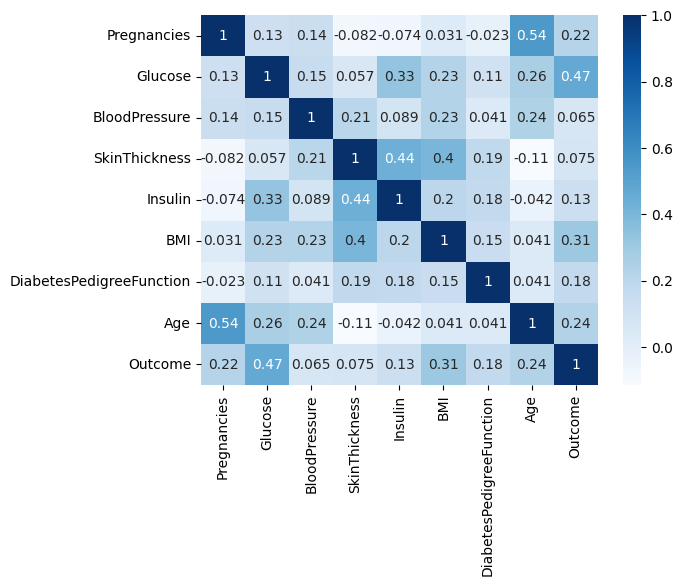

In [ ]:
sns.heatmap(cor, annot=True,cmap='Blues')

<Axes: >

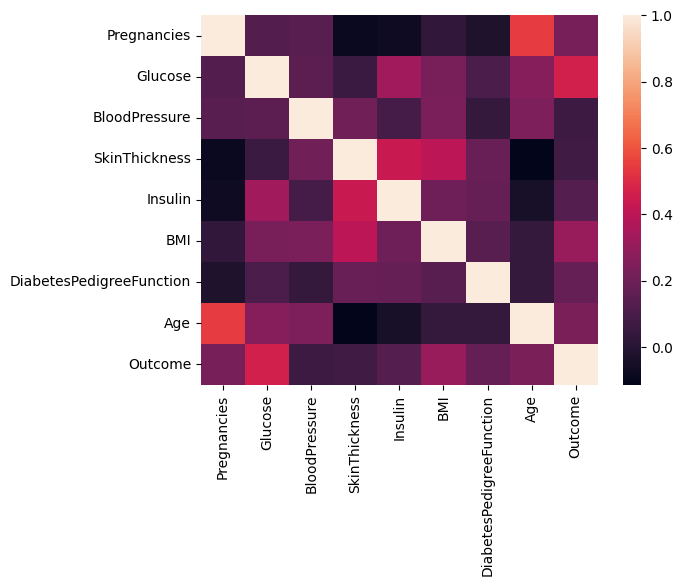

In [ ]:
sns.heatmap(df.corr())

Box Plot

<Axes: >

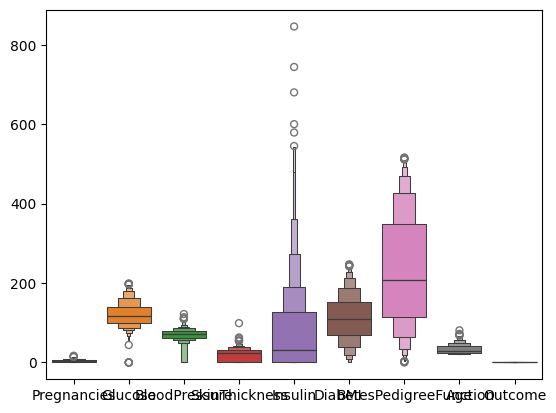

In [ ]:
data= df[['Outcome','Age','BMI','DiabetesPedigreeFunction','Insulin','SkinThickness','BloodPressure','Glucose','Pregnancies']]
sns.boxenplot(data=df)

scatter plot

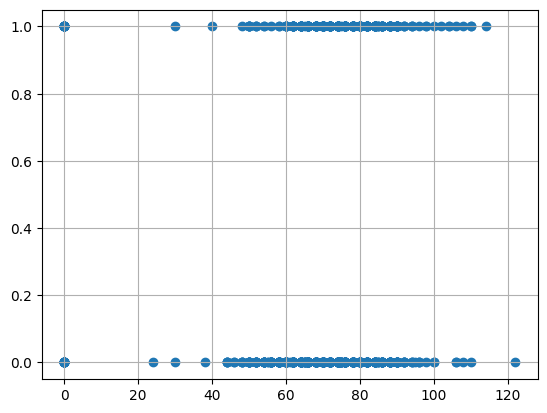

In [ ]:
plt.scatter(data=df, x='BloodPressure',y= 'Outcome')
plt.xlabel = 'BloodPressure'
plt.ylabel = 'Outcome'
plt.title = 'Scatter Plot'
plt.grid(True)
plt.show()

histogram

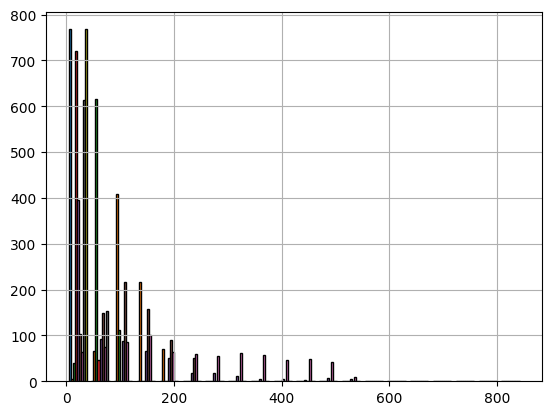

In [ ]:
plt.hist(df,bins=20,edgecolor = 'black')
plt.xlabel='BloodPressure'
plt.ylabel='Outcome'
plt.title='histogram'
plt.grid(True)
plt.show()

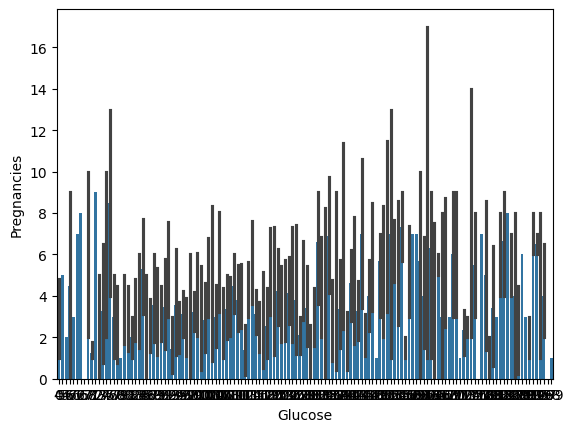

In [ ]:
sns.barplot(x='Glucose',y='Pregnancies' , data=df)
plt.show()

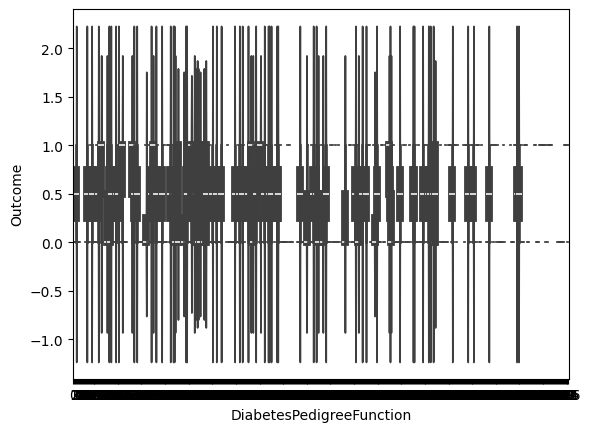

In [ ]:
sns.violinplot(x='DiabetesPedigreeFunction',y='Outcome' , data=df)
plt.show()

linear regression

In [ ]:
le = LinearRegression(n_jobs=1)

In [ ]:
X=df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,123,350,50
1,1,85,66,29,0,62,196,31
2,8,183,64,0,0,30,368,32
3,1,89,66,23,94,77,53,21
4,0,137,40,35,168,209,514,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,118,55,63
764,2,122,70,27,0,155,187,27
765,5,121,72,23,112,58,115,30
766,1,126,60,0,0,95,195,47


In [ ]:
y= df['Outcome']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
le.fit(X_train,y_train)

LinearRegression(n_jobs=1)

In [ ]:
pred = le.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,pred)
r = r2_score(y_test,pred)
print(f'mse: {mse:.4f}')
print(f'r2:{r:.4f}')

mse: 0.1682
r2:0.2673


multivalued linear regression

In [ ]:
mle = LinearRegression(n_jobs =-1)

In [ ]:
mle.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
ypred = mle.predict(X_test)

In [ ]:
mse1 = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
print(f'mse:{mse1:.4f}')
print(f'r2:{r2:.4f}')

mse:0.1682
r2:0.2673


logistic regression

In [ ]:
lr = LogisticRegression(multi_class='ovr', solver = 'lbfgs',random_state=42)

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr', random_state=42)

In [ ]:
predy = lr.predict(X_test)

In [ ]:
acc = accuracy_score(y_test,predy)
print(f'accuracy:{acc:.4f}')

accuracy:0.7532


In [ ]:
cm = confusion_matrix(y_test,predy)
cm

array([[79, 20],
       [18, 37]])

In [ ]:
cr = classification_report(y_test,predy)
cr

'              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81        99\n           1       0.65      0.67      0.66        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n'

ramdomforest

In [ ]:
re = RandomForestClassifier()


In [ ]:
re.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rpred = re.predict(X_test)

In [ ]:
racc = accuracy_score(y_test,rpred)
racc

0.7272727272727273

In [ ]:
rcm = confusion_matrix(y_test,rpred)
rcm

array([[77, 22],
       [20, 35]])

In [ ]:
rcr = classification_report(y_test,rpred)
rcr

'              precision    recall  f1-score   support\n\n           0       0.79      0.78      0.79        99\n           1       0.61      0.64      0.62        55\n\n    accuracy                           0.73       154\n   macro avg       0.70      0.71      0.71       154\nweighted avg       0.73      0.73      0.73       154\n'

svm

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
spred = svm.predict(X_test)

In [ ]:
sacc = accuracy_score(y_test,spred)
sacc

0.7857142857142857

In [ ]:
scm = confusion_matrix(y_test,spred)
scm

array([[87, 12],
       [21, 34]])

In [ ]:
scr = classification_report(y_test,spred)
scr

'              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.84        99\n           1       0.74      0.62      0.67        55\n\n    accuracy                           0.79       154\n   macro avg       0.77      0.75      0.76       154\nweighted avg       0.78      0.79      0.78       154\n'

knn

In [ ]:
X= preprocessing.StandardScaler().fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.18277812,
         0.83591289,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.84049976,
        -0.24147137, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.37730127,
         0.96184092, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.90759995,
        -0.80814751, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.2869232 ,
        -0.24846737,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.23659806,
        -0.43036342, -0.87137393]])

In [ ]:
knn= KNeighborsClassifier(n_neighbors= 3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
kpred = knn.predict(X_test)

In [ ]:
kacc = accuracy_score(y_test,kpred)
kacc

0.6818181818181818

In [ ]:
kcm = confusion_matrix(y_test,kpred)
kcm

array([[74, 25],
       [24, 31]])

In [ ]:
kcr = classification_report(y_test,kpred)
kcr

'              precision    recall  f1-score   support\n\n           0       0.76      0.75      0.75        99\n           1       0.55      0.56      0.56        55\n\n    accuracy                           0.68       154\n   macro avg       0.65      0.66      0.65       154\nweighted avg       0.68      0.68      0.68       154\n'

decision tree

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,123,350,50,1
1,1,85,66,29,0,62,196,31,0
2,8,183,64,0,0,30,368,32,1
3,1,89,66,23,94,77,53,21,0
4,0,137,40,35,168,209,514,33,1


In [ ]:
y = pd.Categorical.from_codes(df['Outcome'], categories=df['Outcome'].unique())

In [ ]:
y = pd.get_dummies(y)
y.head()

,1,0
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True


In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

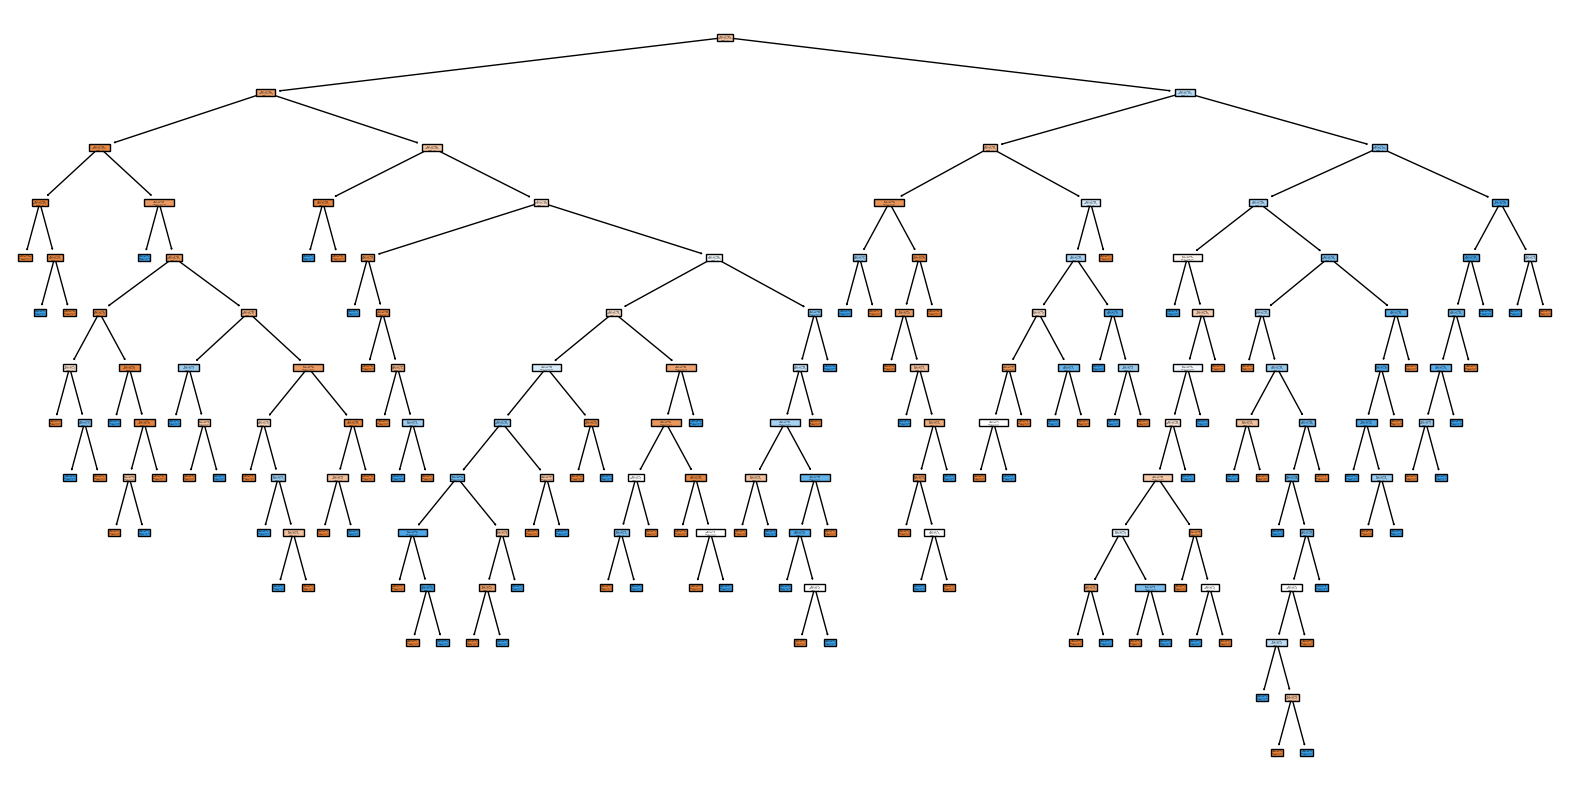

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(dt, filled=True, feature_names=['Age', 'BMI', 'DiabetesPedigreeFunction', 'Insulin','SkinThickness', 'BloodPressure', 'Glucose', 'Pregnancies'], class_names=["0", "1"])
plt.show()


cluster

In [ ]:
y = np.array(y)
y = y.reshape(-1)

K-means

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Spectral clustering

In [ ]:
spectral = SpectralClustering(n_clusters=4,affinity = 'nearest_neighbors', random_state =0)
spred = spectral.fit_predict(X)

DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
dpred = dbscan.fit_predict(X)

In [ ]:
ari_k=adjusted_rand_score(y,kpred)
ari_s=adjusted_rand_score(y,spred)
ari_d=adjusted_rand_score(y,dpred)

ari_k
ari_s
ari_d

ValueError: Found input variables with inconsistent numbers of samples: [1536, 154]

KFold

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
for i,(train_index,test_index) in enumerate(kf.split(X_train.values)):
  X_train_kf,X_val_kf=X_train.values[train_index],X_train.values[test_index]
  y_train_kf,y_val_kf=y_train.values[train_index],y_train.values[test_index]
  svm.fit(X_train_kf,y_train_kf)
  y_pred_kf=svm.predict(X_val_kf)

In [ ]:
kf_acc = accuracy_score(y_val_kf,y_pred_kf)
kf_acc

0.7459016393442623